In [1]:
cd E:\Rscripts\30Day\mean_temp

E:\Rscripts\30Day\mean_temp


In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns             # Seaborn for beautiful plots

tmax = pd.read_csv("islamabad_tmax_final.csv")
tmin = pd.read_csv("islamabad_tmin_final.csv")

In [3]:
tmin['Date'] = pd.to_datetime(tmin['Date'])
tmax['Date'] = pd.to_datetime(tmax['Date'])

tmin = tmin[['Date', 'tmin']]
tmax = tmax[['Date', 'tmax']]

In [14]:
tmin['tmin'] = tmin['tmin'].astype(float)

# Cleaning the tmax data a bit before converting to float
ind = None
for i, row in tmax.iterrows():
    if(".." in str(row['tmax'])):

        value = row['tmax']
        new_value = value.replace("..", ".")
        tmax.iat[i,1] = new_value

    if(" " in str(row['tmax'])):

        value = row['tmax'] 
        new_value = value.replace(" ", "")
        tmax.iat[i, 1] = new_value
tmax['tmax'] = tmax['tmax'].astype(float)

In [15]:
master_df = tmin.copy()
master_df['tmax'] = tmax['tmax']
master_df.sort_index(inplace = True)

In [24]:
master_df['tmean'] = master_df.apply(lambda row: (row['tmin'] + row['tmax']) / 2
                                    , axis = 1)

reference_period = (1991, 2015)
comparison_period = 2016

reference_df = master_df.loc[(master_df['Date'].dt.year >=reference_period[0]) & (master_df['Date'].dt.year <=reference_period[1])].reset_index(drop=True)
comparison_df = master_df.loc[master_df['Date'].dt.year == comparison_period].reset_index(drop = True)


In [25]:
# preparing the reference df

reference_df['month'] = reference_df['Date'].dt.month
reference_df['day'] = reference_df['Date'].dt.day
reference_df = reference_df.drop(["tmin", "tmax"], axis = 1)
reference_df = reference_df.groupby(by = ["month", "day"]).mean()

# preparing the data for the plot

x = np.array(np.arange(len(comparison_df['tmean'])))
comparison_y = comparison_df['tmean'].to_numpy()
reference_y = reference_df['tmean'].to_numpy()


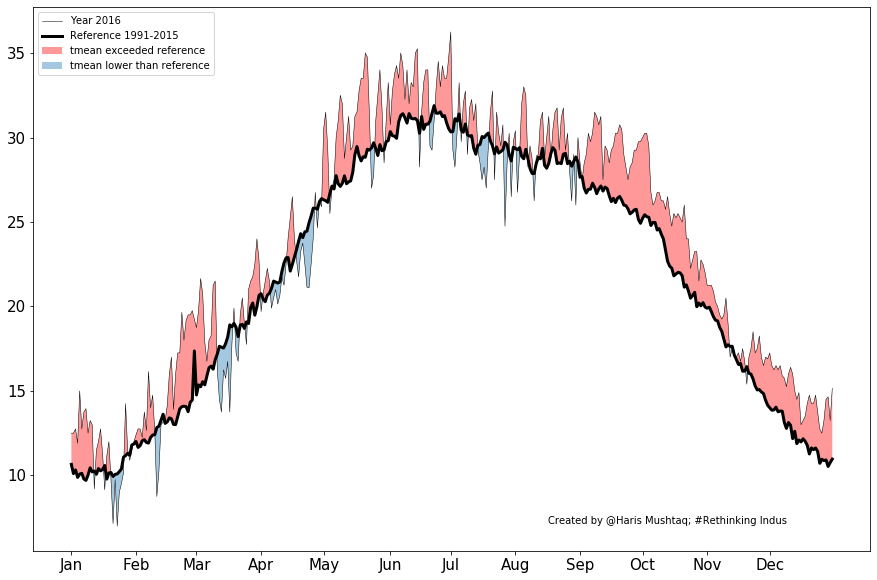

In [26]:



fig = plt.figure()
ax = plt.gca()

ax.plot(x, comparison_y, color = 'black', label = "Year {}".format(comparison_period), lw = 0.5)
ax.plot(x, reference_y, color = 'black', lw =3, label = str("Reference {}-{}".format(reference_period[0], reference_period[1])))
ax.fill_between(x, comparison_y, reference_y, where=comparison_y > reference_y, fc = '#FF0000', alpha = 0.4, label = "tmean exceeded reference", interpolate=True)
ax.fill_between(x, comparison_y, reference_y, where=comparison_y < reference_y, fc = 'C0', alpha = 0.4, label = "tmean lower than reference", interpolate = True)
# ax.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True)
ax.legend(loc='upper left')
xticks = [0, 31, 60, 91, 121, 153, 182, 213, 244, 274, 305, 335]
xtick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)
ax.text(0.9, 0.05, 'Created by @Haris Mushtaq; #Rethinking Indus', transform=ax.transAxes, ha='right',
            color='k', bbox=dict(facecolor='white', alpha=1, edgecolor='white'))
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
#plt.grid(axis = 'y')
#ax.set_ylabel("Mean daily Temperature")
#plt.title("Chitral Climatology (1965-2014)",fontsize=20)
fig.set_size_inches(15,10)
#plt.savefig("mean_temp_islamabad_new.png", dpi =300, bbox_inches="tight")

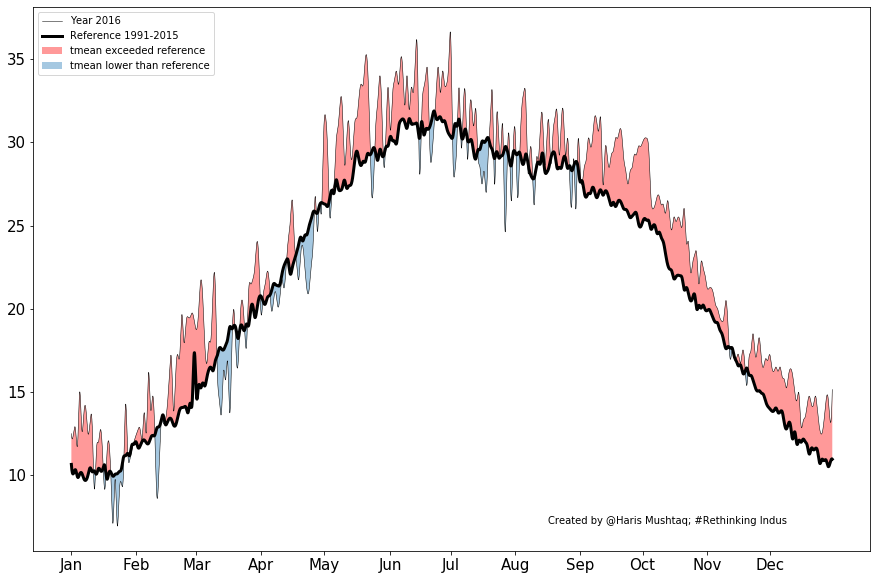

In [27]:
# preparing the data for the plot
from scipy.interpolate import make_interp_spline
x = np.array(np.arange(len(comparison_df['tmean'])))
comparison_y = comparison_df['tmean'].to_numpy()
reference_y = reference_df['tmean'].to_numpy()

reference_spline = make_interp_spline(x, reference_y)
comparison_spline = make_interp_spline(x, comparison_y)




x = np.linspace(x.min(), x.max(), 10000)
reference_y = reference_spline(x)
comparison_y = comparison_spline(x)


fig = plt.figure()
ax = plt.gca()

ax.plot(x, comparison_y, color = 'black', label = "Year {}".format(comparison_period), lw = 0.5)
ax.plot(x, reference_y, color = 'black', lw =3, label = str("Reference {}-{}".format(reference_period[0], reference_period[1])))
ax.fill_between(x, comparison_y, reference_y, where=comparison_y > reference_y, fc = '#FF0000', alpha = 0.4, label = "tmean exceeded reference", interpolate=True)
ax.fill_between(x, comparison_y, reference_y, where=comparison_y < reference_y, fc = 'C0', alpha = 0.4, label = "tmean lower than reference", interpolate = True)
# ax.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True)
ax.legend(loc='upper left')
xtick_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
ax.set_xticks(xticks)
ax.set_xticklabels(xtick_labels)
ax.text(0.9, 0.05, 'Created by @Haris Mushtaq; #Rethinking Indus', transform=ax.transAxes, ha='right',
            color='k', bbox=dict(facecolor='white', alpha=1, edgecolor='white'))
ax.yaxis.set_tick_params(labelsize=15)
ax.xaxis.set_tick_params(labelsize=15)
#plt.grid(axis = 'y')
#ax.set_ylabel("Mean daily Temperature")
#plt.title("Chitral Climatology (1965-2014)",fontsize=20)
fig.set_size_inches(15,10)
plt.savefig("mean_temp_islamabad_smoothened_1991-2015.png", dpi =300, bbox_inches="tight")

In [31]:
temp_df

,Xvalue,Yvalue
0,0,12.50
1,1,12.50
2,2,12.75
3,3,11.90
4,4,15.00
...,...,...
361,361,13.25
362,362,14.50
363,363,14.65
364,364,13.25
